In [11]:
import nltk
import pandas as pd

- Stylometry?
- TF/IDF?
- Categorization?
  - Ch. 6
  - Sentiment analysis
  - Naive bayes categorizer
    - British/American "an" categorizer
    - Trump/Clinton categorizer
    - Spam/nospam
- [[http://www.thegrammarlab.com/?nor-portfolio=corpus-of-presidential-speeches-cops-and-a-clintontrump-corpus][Trump corpus?]]
- Making a generator?

In [2]:
from nltk.corpus import gutenberg

In [3]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
words = [gutenberg.words(fileid) for fileid in gutenberg.fileids()]

In [29]:
freqs = [nltk.FreqDist(wordList[:2000]) for wordList in words]

In [30]:
df = pd.DataFrame(freqs).T / [len(wordList) for wordList in words]

In [31]:
df.columns = gutenberg.fileids()

<AxesSubplot:>

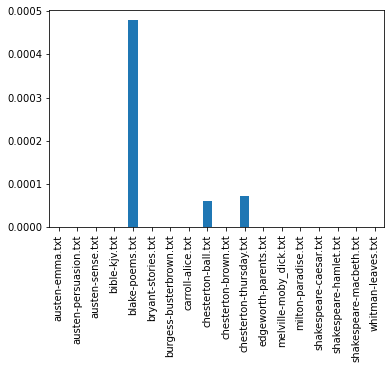

In [36]:
df.loc['cloud'].plot(kind='bar')

In [37]:
from nltk.corpus import movie_reviews

In [38]:
movie_reviews.categories()

['neg', 'pos']

In [39]:
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]


In [40]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [41]:
word_features = list(all_words)[:2000]

In [42]:
def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [44]:
# print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

In [45]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [46]:
print(nltk.classify.accuracy(classifier, test_set))

0.86


In [51]:
classifier.classify(featuresets[-1][0])

'pos'

(['truman',
  '(',
  '"',
  'true',
  '-',
  'man',
  '"',
  ')',
  'burbank',
  'is',
  'the',
  'perfect',
  'name',
  'for',
  'jim',
  'carrey',
  "'",
  's',
  'character',
  'in',
  'this',
  'film',
  '.',
  'president',
  'truman',
  'was',
  'an',
  'unassuming',
  'man',
  'who',
  'became',
  'known',
  'worldwide',
  ',',
  'in',
  'spite',
  'of',
  '(',
  'or',
  'was',
  'it',
  'because',
  'of',
  ')',
  'his',
  'stature',
  '.',
  '"',
  'truman',
  '"',
  'also',
  'recalls',
  'an',
  'era',
  'of',
  'plenty',
  'following',
  'a',
  'grim',
  'war',
  ',',
  'an',
  'era',
  'when',
  'planned',
  'communities',
  'built',
  'by',
  'government',
  'scientists',
  'promised',
  'an',
  'idyllic',
  'life',
  'for',
  'americans',
  '.',
  'and',
  'burbank',
  ',',
  'california',
  ',',
  'brings',
  'to',
  'mind',
  'the',
  'tonight',
  'show',
  'and',
  'the',
  'home',
  'of',
  'nbc',
  '.',
  'if',
  'hollywood',
  'is',
  'the',
  'center',
  'of',
  't